In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# I am going to load the iris dataset and let's do some exploration
import pandas as pd
df=pd.read_csv("/content/heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
#Lets see the shape of data
df.shape

(303, 14)

**We have 150 * 5 data in the above data set so let's do some exploration and apply the linear algorithm to find the target value.**

In [ ]:
#Let's check whether we have the null value or not
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#To see a random of 10 sample from the dataset use .sample() method
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


RANDOM FOREST

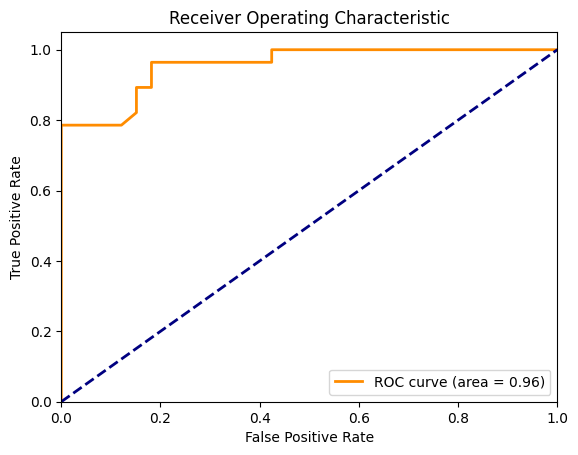

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Load the dataframe. Replace 'your_data.csv' with the actual file name
df = pd.read_csv('/content/heart.csv')

clfr = RandomForestClassifier(random_state=100)

clfr = RandomForestClassifier(random_state=100)

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Fitting the training data
clfr.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = clfr.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # import the module to split the data
from sklearn import metrics

clfr= RandomForestClassifier(random_state = 100)

# Split the data into training and testing sets
X = df.drop('target', axis=1) # Assuming 'target' is the name of your target variable column
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # Adjust test_size and random_state as needed

#fitting the training data
clfr.fit(X_train, y_train)
clfr_pred = clfr.predict(X_test)
print(metrics.accuracy_score(y_test, clfr_pred))

0.8688524590163934


0.8688524590163934


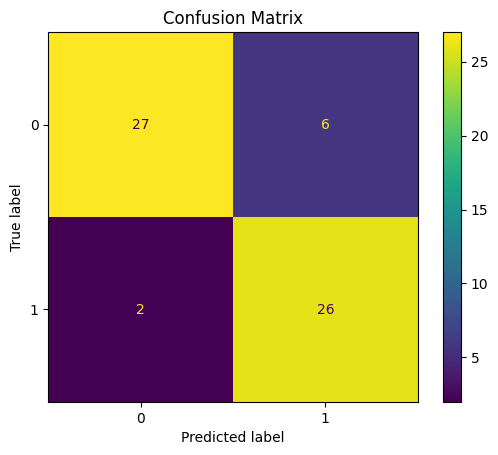

In [ ]:
import pandas as pd # Make sure you have pandas imported
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt # Make sure you have matplotlib imported

# Load the dataframe. Replace 'your_data.csv' with the actual file name
df = pd.read_csv('/content/heart.csv')

clfr= RandomForestClassifier(random_state = 100)

# Split the data into training and testing sets
X = df.drop('target', axis=1) # Assuming 'target' is the name of your target variable column
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # Adjust test_size and random_state as needed

#fitting the training data
clfr.fit(X_train, y_train)
clfr_pred = clfr.predict(X_test)
print(metrics.accuracy_score(y_test, clfr_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have your predictions 'clfr_pred' and true labels 'y_test'
cm = confusion_matrix(y_test, clfr_pred) #Removed extra space at the beginning of the line
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

DECISION TREE

In [ ]:
#Decision Tree :=


from sklearn import tree

In [ ]:
import pandas as pd # Import the pandas library
from sklearn import tree #Make sure that tree is imported

heart = pd.read_csv('heart.csv') # Assuming your file is named 'heart.csv'
clf = tree.DecisionTreeClassifier()

# Use the values attribute to get the NumPy array representation of the data
clf = clf.fit(heart.values[:, :-1], heart.values[:, -1]) # Fit the model using all columns except the last one as features and the last column as the target variable

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("heart")

'heart.pdf'

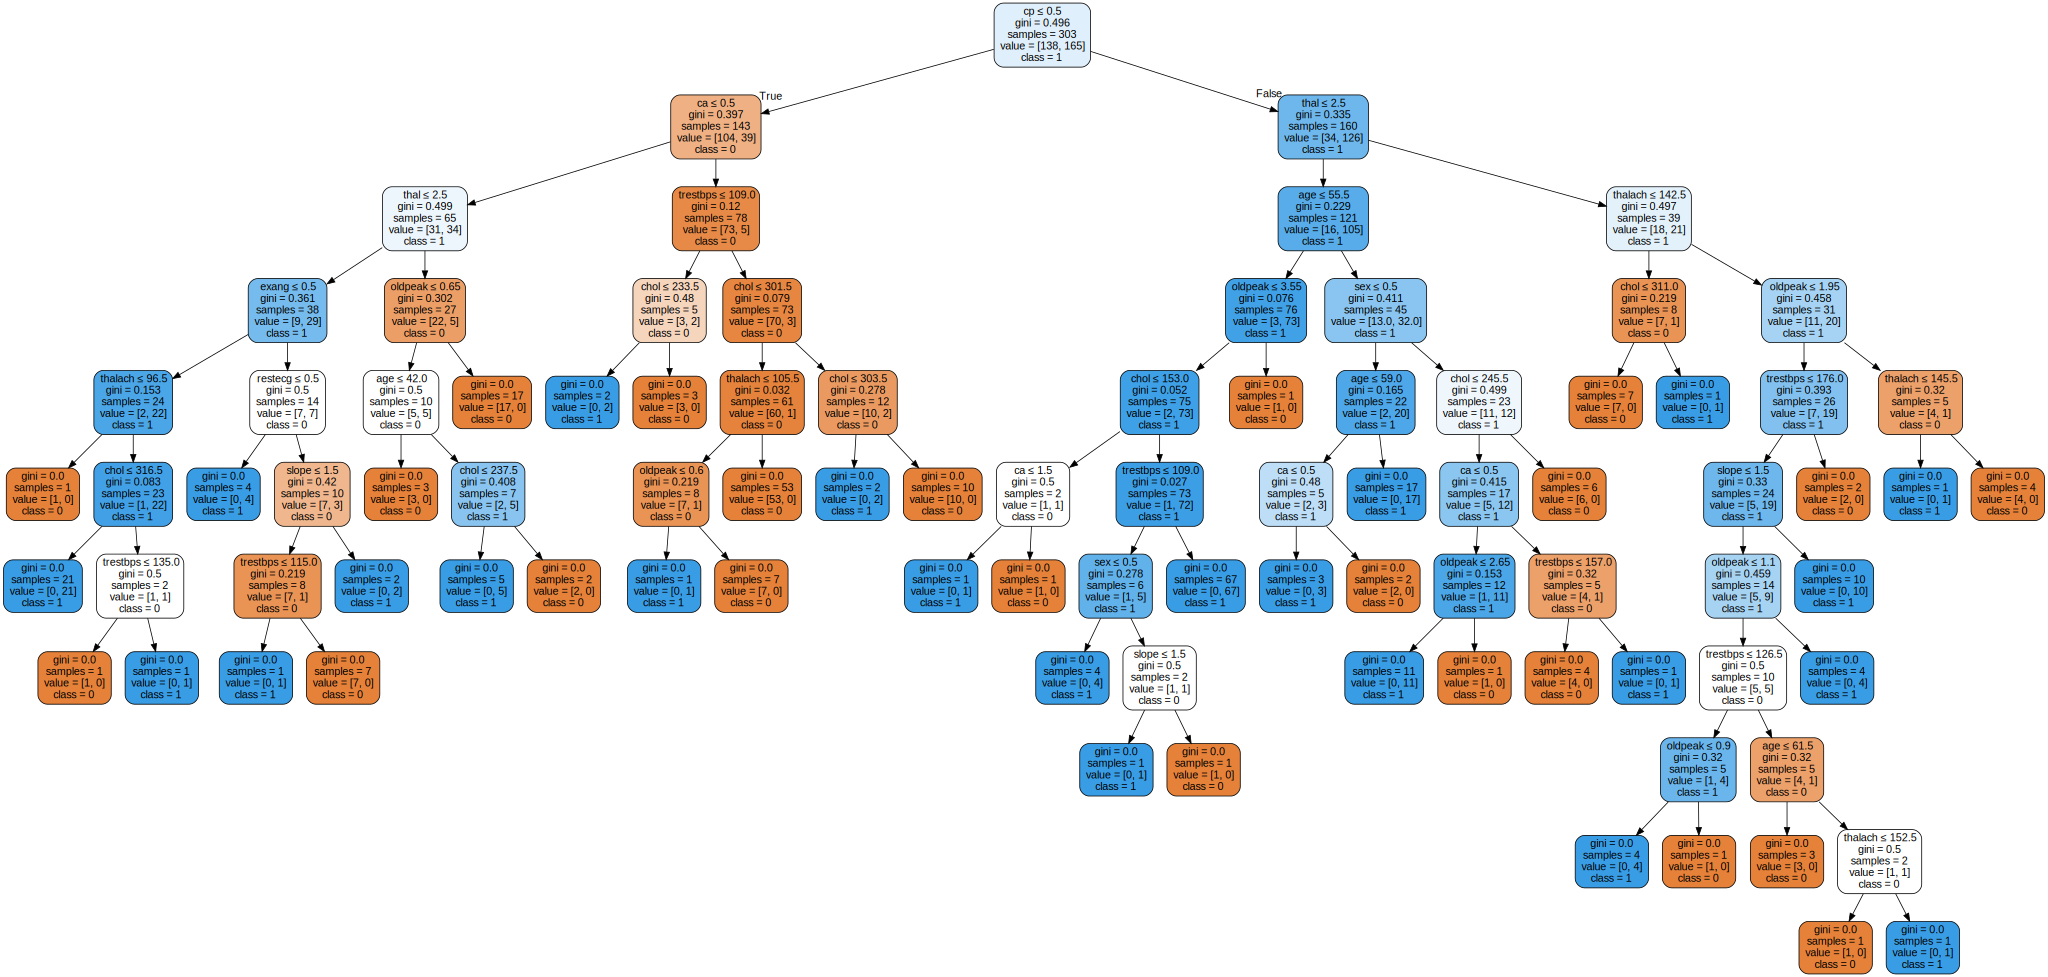

In [ ]:
import graphviz
from sklearn import tree #Make sure that tree is imported
import pandas as pd

heart = pd.read_csv('heart.csv') # Assuming your file is named 'heart.csv'
clf = tree.DecisionTreeClassifier()

# Use the values attribute to get the NumPy array representation of the data
clf = clf.fit(heart.values[:, :-1], heart.values[:, -1]) # Fit the model using all columns except the last one as features and the last column as the target variable


dot_data = tree.export_graphviz(clf, out_file=None,
                feature_names=heart.columns[:-1], # Use heart column names as feature names
                class_names=['0', '1'], # Assuming your target variable has two classes
                filled=True, rounded=True,
                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# prompt: code to calculate accuracy of model using decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'heart' dataframe is already loaded and preprocessed

# Split the data into training and testing sets
X = heart.drop('target', axis=1)  # Features
y = heart['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.8524590163934426


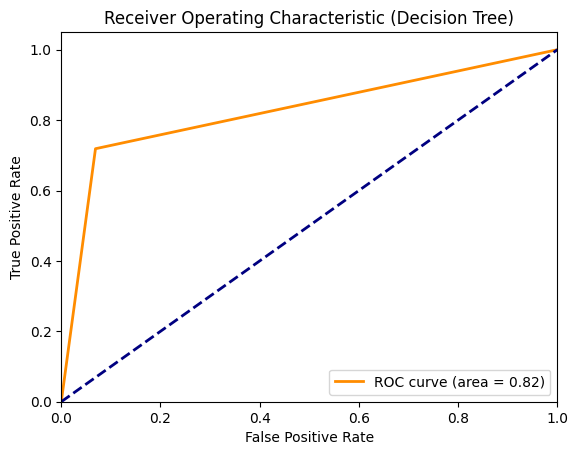

In [ ]:
# prompt: roc curve for decision tree model

# Assuming you have your predictions 'y_pred' and true labels 'y_test' from your Decision Tree model
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt # Import matplotlib for plotting
# Assuming 'heart' dataframe is already loaded and preprocessed
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

heart = pd.read_csv('heart.csv') # Assuming your file is named 'heart.csv'
# Split the data into training and testing sets
X = heart.drop('target', axis=1)  # Features
y = heart['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure() # Create a new Matplotlib figure
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show() # Explicitly call plt.show() to display the plot

RANDOM FOREST PREDICTION

In [ ]:
# prompt: give me prediction model using random forest  where i can enter user inputs to  predict the model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataframe
df = pd.read_csv('/content/heart.csv')

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train, y_train)


def predict_heart_disease(user_input):
  """Predicts heart disease based on user input.

  Args:
    user_input: A dictionary containing user input values for each feature.
      The keys should match the column names of the dataset.

  Returns:
    A prediction (0 or 1) indicating the presence or absence of heart disease.
  """
  # Create a DataFrame from user input
  input_df = pd.DataFrame([user_input])

  # Make a prediction using the trained model
  prediction = clf.predict(input_df)[0]

  return prediction


# Example user input (replace with actual values)
user_input = {
    'age': 55,
    'sex': 1,
    'cp': 0,
    'trestbps': 140,
    'chol': 230,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 2.3,
    'slope': 1,
    'ca': 0,
    'thal': 2
}

# Get the prediction
prediction = predict_heart_disease(user_input)

# Print the prediction
if prediction == 1:
  print("Prediction: Heart disease is likely present.")
else:
  print("Prediction: Heart disease is likely absent.")



Prediction: Heart disease is likely present.


XG BOOST

In [ ]:
# prompt: train using XG boost

!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataframe
df = pd.read_csv('/content/heart.csv')

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=100)
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("XGBoost Accuracy:", accuracy)


XGBoost Accuracy: 0.819672131147541


XG BOOST PREDICTION

In [ ]:
# prompt: give me prediction model using XG boost  where i can enter user inputs to  predict the model

# Load the dataframe
df = pd.read_csv('/content/heart.csv')

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=100)
xgb_model.fit(X_train, y_train)


def predict_heart_disease_xgboost(user_input):
  """Predicts heart disease based on user input using XGBoost.

  Args:
    user_input: A dictionary containing user input values for each feature.
      The keys should match the column names of the dataset.

  Returns:
    A prediction (0 or 1) indicating the presence or absence of heart disease.
  """
  # Create a DataFrame from user input
  input_df = pd.DataFrame([user_input])

  # Make a prediction using the trained XGBoost model
  prediction = xgb_model.predict(input_df)[0]

  return prediction


# Example user input (replace with actual values)
user_input = {
    'age': 55,
    'sex': 1,
    'cp': 0,
    'trestbps': 140,
    'chol': 230,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 2.3,
    'slope': 1,
    'ca': 0,
    'thal': 2
}

# Get the prediction
prediction = predict_heart_disease_xgboost(user_input)

# Print the prediction
if prediction == 1:
  print("XGBoost Prediction: Heart disease is likely present.")
else:
  print("XGBoost Prediction: Heart disease is likely absent.")


XGBoost Prediction: Heart disease is likely present.


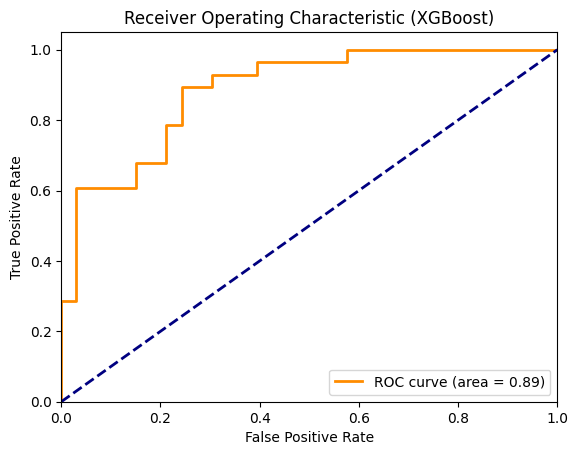

In [ ]:
# prompt: ROC curve for XG boost

!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataframe
df = pd.read_csv('/content/heart.csv')

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=100) # Re-initialize and train the model here
xgb_model.fit(X_train, y_train)

# Assuming you have your predictions 'y_pred' and true labels 'y_test' from your XGBoost model
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost)')
plt.legend(loc="lower right")
plt.show()

COMPARING ALL MODELS

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/heart.csv')

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Random Forest
rf_model = RandomForestClassifier(random_state=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=100)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=100)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Print the accuracies
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


Logistic Regression Accuracy: 0.8360655737704918
Random Forest Accuracy: 0.8688524590163934
Decision Tree Accuracy: 0.7377049180327869
XGBoost Accuracy: 0.819672131147541


In [ ]:
# prompt: give me sensitivity ,specificity , precision, negative prediction values,false positive rate , false discovery rate , false negative rate , F1 score , standard deviation, mean absolute error , mean squared error, root mean square errored  for Random forest , decision tree , Xg boost and logistic regression models

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
)
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('/content/heart.csv')

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_pred_proba):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    negative_predictive_value = tn / (tn + fn)
    false_positive_rate = fp / (fp + tn)
    false_discovery_rate = fp / (fp + tp)
    false_negative_rate = fn / (fn + tp)
    f1 = f1_score(y_true, y_pred)
    std_dev = np.std(y_true - y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'Negative Predictive Value': negative_predictive_value,
        'False Positive Rate': false_positive_rate,
        'False Discovery Rate': false_discovery_rate,
        'False Negative Rate': false_negative_rate,
        'F1 Score': f1,
        'Standard Deviation': std_dev,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
    }


# Train and evaluate models
models = {
    'Random Forest': RandomForestClassifier(random_state=100),
    'Decision Tree': DecisionTreeClassifier(random_state=100),
    'XGBoost': xgb.XGBClassifier(random_state=100),
    'Logistic Regression': LogisticRegression(max_iter=1000),
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    results[model_name] = calculate_metrics(y_test, y_pred, y_pred_proba)

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name} Metrics:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Random Forest Metrics:
Sensitivity: 0.9286
Specificity: 0.8182
Precision: 0.8125
Negative Predictive Value: 0.9310
False Positive Rate: 0.1818
False Discovery Rate: 0.1875
False Negative Rate: 0.0714
F1 Score: 0.8667
Standard Deviation: 0.3562
Mean Absolute Error: 0.1311
Mean Squared Error: 0.1311
Root Mean Squared Error: 0.3621

Decision Tree Metrics:
Sensitivity: 0.8214
Specificity: 0.6667
Precision: 0.6765
Negative Predictive Value: 0.8148
False Positive Rate: 0.3333
False Discovery Rate: 0.3235
False Negative Rate: 0.1786
F1 Score: 0.7419
Standard Deviation: 0.5026
Mean Absolute Error: 0.2623
Mean Squared Error: 0.2623
Root Mean Squared Error: 0.5121

XGBoost Metrics:
Sensitivity: 0.8929
Specificity: 0.7576
Precision: 0.7576
Negative Predictive Value: 0.8929
False Positive Rate: 0.2424
False Discovery Rate: 0.2424
False Negative Rate: 0.1071
F1 Score: 0.8197
Standard Deviation: 0.4167
Mean Absolute Error: 0.1803
Mean Squared Error: 0.1803
Root Mean Squared Error: 0.4247

Logistic 

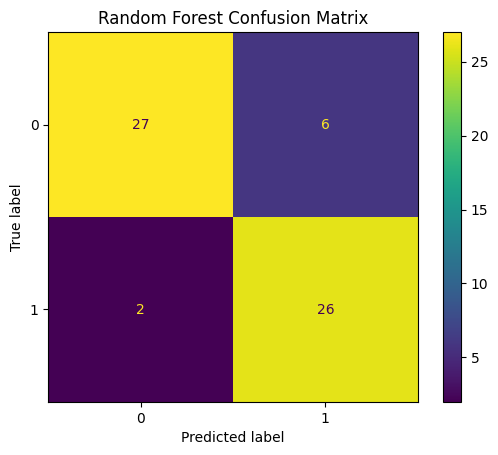

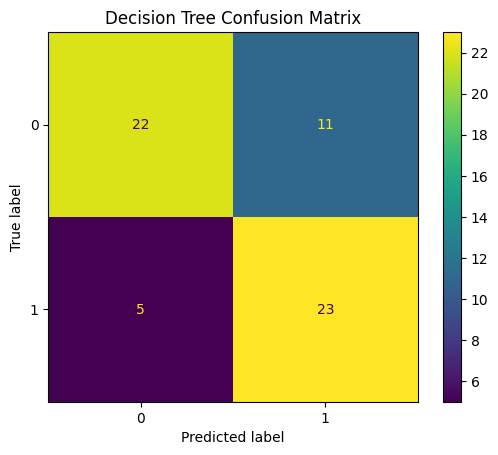

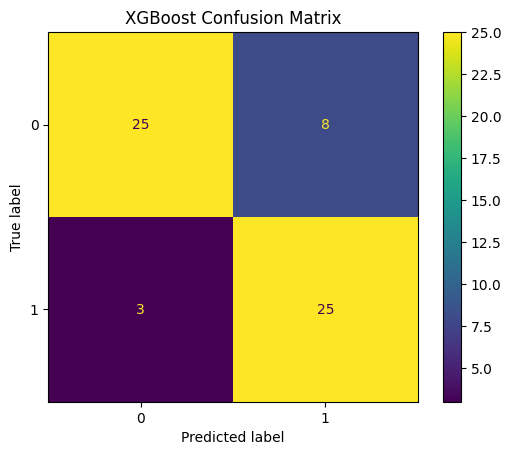

In [ ]:
# prompt: confusion matrix for random forest , decisoon tree , xg boost

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Importing necessary modules
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
import xgboost as xgb # Import xgboost
import pandas as pd
from sklearn.model_selection import train_test_split


# Load the dataframe
df = pd.read_csv('/content/heart.csv')

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

# Initialize and train the models here to make them available in the current scope
rf_model = RandomForestClassifier(random_state=100) # Initialize rf_model
rf_model.fit(X_train, y_train) # Train rf_model

dt_model = DecisionTreeClassifier(random_state=100) # Initialize dt_model
dt_model.fit(X_train, y_train) # Train dt_model

xgb_model = xgb.XGBClassifier(random_state=100) # Initialize xgb_model
xgb_model.fit(X_train, y_train) # Train xgb_model


# Random Forest Confusion Matrix
y_pred_rf = rf_model.predict(X_test) # Changed clfr to rf_model
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

# Decision Tree Confusion Matrix
y_pred_dt = dt_model.predict(X_test) # Changed clf to dt_model
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

# XGBoost Confusion Matrix
y_pred_xgb = xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()